# Pre-processing (state / organization Name) Regulatory data for WaDE upload.
- Purpose:  To preprocess the data into one master file for simple DataFrame creation and extraction.

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# ---- working directory ----
workingDirString = "G:/Shared drives/WaDE Data/Wyoming/Regulatory" # set working directory folder string here
os.chdir(workingDirString)
print(f'The working Directory is:', workingDirString)

The working Directory is: G:/Shared drives/WaDE Data/Wyoming/Regulatory


## Regulatory Area Data #1

In [21]:
# Input File
inputFile = "RawInputData/shapefiles/NRCS_-_Conservation_Districts.zip"
dfin1 = gpd.read_file(inputFile).replace(np.nan, "")

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfin1:
    dfin1['WaDEUUID'] = "re" + dfin1.index.astype(str)
    dfin1.to_csv('RawInputData/NRCS_-_Conservation_Districts.zip', compression=dict(method='zip', archive_name='NRCS_-_Conservation_Districts.csv'), index=False)

# Realign Geometry Projection
dfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

print(len(dfin1))
dfin1.head()

35


,OBJECTID,entityname,District,Office,County,CountyCode,PhoneNum,Office_ID,Shape_Leng,Shape_Area,CNSVDSTR,geometry,WaDEUUID
0,1,Campbell County Conservation,Campbell County CD,Gillette Service Center,Campbell,005,307-682-8843,66904,680079.19278,24212040527.80907,Campbell County CD,"POLYGON ((-106.01896 43.71191, -106.01887 43.7...",re0
1,2,Clear Creek Conservation,Lake De Smet CD,Buffalo Service Center,Johnson,019,307-684-2526,66928,492838.49438,11462600418.56535,Lake De Smet CD,"POLYGON ((-107.37180 44.55729, -107.37138 44.5...",re1
2,3,Cody Conservation,Powell - Clarks Fork CD,Powell Service Center,Park,029,307-754-9301,66943,1018393.37491,25328296430.75972,Cody CD,"POLYGON ((-111.05630 44.85824, -111.05624 44.8...",re2
3,4,Converse County Conservation,Converse County CD,Douglas Service Center,Converse,009,307-358-3050,66910,646404.76547,20650547614.46943,Converse County CD,"POLYGON ((-106.07852 43.49082, -106.07845 43.4...",re3
4,5,Crook County Natural Resource,Crook County NRD,Sundance Service Center,Crook,011,307-283-2870,66913,488860.90977,14660110606.46379,Crook County NRD,"POLYGON ((-105.08952 44.90938, -105.08943 44.9...",re4


In [4]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfin1['WaDEUUID']

# Date Info
df['in_Date'] = "2023"
df['in_Year'] = "9/26/2023"

# Organization Info
df['in_OrganizationUUID'] = "WYre_O1"

# ReportingUnit Info
df['in_EPSGCodeCV'] = "4326"
df['in_ReportingUnitName'] = dfin1["entityname"]
df['in_ReportingUnitNativeID'] = "wy" + dfin1["OBJECTID"].astype(str)
df['in_ReportingUnitProductVersion'] = ""
df['in_ReportingUnitTypeCV'] = "Conservation Districts"
df['in_ReportingUnitUpdateDate'] = "7/30/2023"
df['in_StateCV'] = "WY"
df['in_Geometry'] = ""

# RegulatoryOverlay Info
df['in_OversightAgency'] = "Wyoming Association of Conservation Districts"
df['in_RegulatoryDescription'] = "Selects conservation policy priorities which are used to develop and review environmental and natural resources legislation and to secure adequate federal funding for natural resources conservation programs."
df['in_RegulatoryName'] = dfin1["entityname"]
df['in_RegulatoryOverlayNativeID'] = dfin1["OBJECTID"]
df['in_RegulatoryStatusCV'] = "Active"
df['in_RegulatoryStatute'] = ""
df['in_RegulatoryStatuteLink'] =""
df['in_StatutoryEffectiveDate'] = "3/1/1941"
df['in_StatutoryEndDate'] = ""
df['in_RegulatoryOverlayTypeCV'] = "Conservation District"
df['in_WaterSourceTypeCV'] = "Surface and Groundwater"

df = df.drop_duplicates().reset_index(drop=True)
outdf1 = df.copy()
print(len(outdf1))
outdf1.head()

35


,WaDEUUID,in_Date,in_Year,in_OrganizationUUID,in_EPSGCodeCV,in_ReportingUnitName,in_ReportingUnitNativeID,in_ReportingUnitProductVersion,in_ReportingUnitTypeCV,in_ReportingUnitUpdateDate,in_StateCV,in_Geometry,in_OversightAgency,in_RegulatoryDescription,in_RegulatoryName,in_RegulatoryOverlayNativeID,in_RegulatoryStatusCV,in_RegulatoryStatute,in_RegulatoryStatuteLink,in_StatutoryEffectiveDate,in_StatutoryEndDate,in_RegulatoryOverlayTypeCV,in_WaterSourceTypeCV
0,re0,2023,9/26/2023,WYre_O1,4326,Campbell County Conservation,wy1,,Conservation Districts,7/30/2023,WY,,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Campbell County Conservation,1,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
1,re1,2023,9/26/2023,WYre_O1,4326,Clear Creek Conservation,wy2,,Conservation Districts,7/30/2023,WY,,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Clear Creek Conservation,2,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
2,re2,2023,9/26/2023,WYre_O1,4326,Cody Conservation,wy3,,Conservation Districts,7/30/2023,WY,,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Cody Conservation,3,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
3,re3,2023,9/26/2023,WYre_O1,4326,Converse County Conservation,wy4,,Conservation Districts,7/30/2023,WY,,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Converse County Conservation,4,Active,,,3/1/1941,,Conservation District,Surface and Groundwater
4,re4,2023,9/26/2023,WYre_O1,4326,Crook County Natural Resource,wy5,,Conservation Districts,7/30/2023,WY,,Wyoming Association of Conservation Districts,Selects conservation policy priorities which a...,Crook County Natural Resource,5,Active,,,3/1/1941,,Conservation District,Surface and Groundwater


## Regulatory Area #2

In [5]:
# etc etc,

## Concatenate DataFrames together

In [6]:
# Concatenate dataframes
frames = [outdf1] # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

35


## Clean Data / data types

In [7]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [8]:
outdf['in_ReportingUnitName'] = df.apply(lambda row: ensureEmptyString(row['in_ReportingUnitName']), axis=1)
outdf['in_ReportingUnitName'].unique()

array(['Campbell County Conservation', 'Clear Creek Conservation',
       'Cody Conservation', 'Converse County Conservation',
       'Crook County Natural Resource', 'Dubois-Crowheart Conservation',
       'Hot Springs Conservation', 'Laramie County Conservation',
       'Laramies River Conservation', 'Lincoln Conservation',
       'Lingle-Ft. Laramie Conservation',
       'Little Snake River Conservation', 'Lower Wind River Conservation',
       'Medicine Bow Conservation', 'Meeteetse Conservation',
       'Natrona County Conservation', 'Niobrara Conservation',
       'North Platte Conservation', 'Platte County Resource',
       'Popo Agie Conservation', 'Powder River Conservation',
       'Powell-Clarks Fork Conservation',
       'Saratoga-Encampment-Rawlins Conservation',
       'Sheridan County Conservation', 'Shoshone Conservation',
       'South Big Horn Conservation', 'South Goshen Conservation',
       'Star Valley Conservation', 'Sublette County Conservation',
       'Sweetwa

In [9]:
outdf['in_RegulatoryDescription'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryDescription']), axis=1)
outdf['in_RegulatoryDescription'].unique()

array(['Selects conservation policy priorities which are used to develop and review environmental and natural resources legislation and to secure adequate federal funding for natural resources conservation programs.'],
      dtype=object)

In [10]:
outdf['in_RegulatoryName'] = df.apply(lambda row: ensureEmptyString(row['in_RegulatoryName']), axis=1)
outdf['in_RegulatoryName'].unique()

array(['Campbell County Conservation', 'Clear Creek Conservation',
       'Cody Conservation', 'Converse County Conservation',
       'Crook County Natural Resource', 'Dubois-Crowheart Conservation',
       'Hot Springs Conservation', 'Laramie County Conservation',
       'Laramies River Conservation', 'Lincoln Conservation',
       'Lingle-Ft. Laramie Conservation',
       'Little Snake River Conservation', 'Lower Wind River Conservation',
       'Medicine Bow Conservation', 'Meeteetse Conservation',
       'Natrona County Conservation', 'Niobrara Conservation',
       'North Platte Conservation', 'Platte County Resource',
       'Popo Agie Conservation', 'Powder River Conservation',
       'Powell-Clarks Fork Conservation',
       'Saratoga-Encampment-Rawlins Conservation',
       'Sheridan County Conservation', 'Shoshone Conservation',
       'South Big Horn Conservation', 'South Goshen Conservation',
       'Star Valley Conservation', 'Sublette County Conservation',
       'Sweetwa

In [11]:
#Update datatype of StatutoryEffectiveDate to fit WaDE 2.0 structure
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'], errors = 'coerce')
outdf['in_StatutoryEffectiveDate'] = pd.to_datetime(outdf['in_StatutoryEffectiveDate'].dt.strftime('%m/%d/%Y'))
outdf['in_StatutoryEffectiveDate'].unique()

array(['1941-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

# Shapefile Data
- For attaching geometry to reporting unit info.

#### Regulatory Area #1 shapefile info

In [12]:
# Input File
shapeInputFile = "RawInputData/shapefiles/NRCS_-_Conservation_Districts.zip"
gdfin1 = gpd.read_file(shapeInputFile)

# Realign Geometry Projection
gdfin1['geometry'] = dfin1['geometry'].to_crs(epsg=4326)

print(len(gdfin1))
gdfin1.head()

35


,OBJECTID,entityname,District,Office,County,CountyCode,PhoneNum,Office_ID,Shape_Leng,Shape_Area,CNSVDSTR,geometry
0,1,Campbell County Conservation,Campbell County CD,Gillette Service Center,Campbell,005,307-682-8843,66904,680079.19278,24212040527.80907,Campbell County CD,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,2,Clear Creek Conservation,Lake De Smet CD,Buffalo Service Center,Johnson,019,307-684-2526,66928,492838.49438,11462600418.56535,Lake De Smet CD,"POLYGON ((-107.37180 44.55729, -107.37138 44.5..."
2,3,Cody Conservation,Powell - Clarks Fork CD,Powell Service Center,Park,029,307-754-9301,66943,1018393.37491,25328296430.75972,Cody CD,"POLYGON ((-111.05630 44.85824, -111.05624 44.8..."
3,4,Converse County Conservation,Converse County CD,Douglas Service Center,Converse,009,307-358-3050,66910,646404.76547,20650547614.46943,Converse County CD,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,5,Crook County Natural Resource,Crook County NRD,Sundance Service Center,Crook,011,307-283-2870,66913,488860.90977,14660110606.46379,Crook County NRD,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."


<AxesSubplot: >

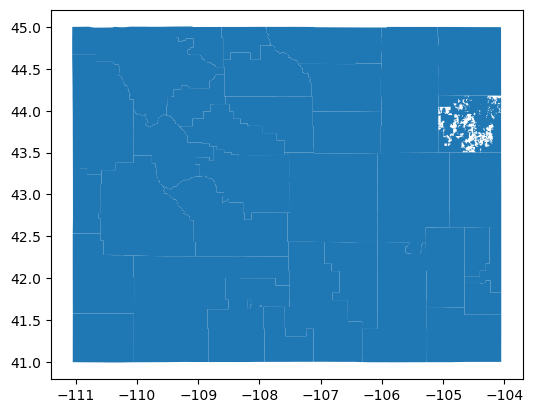

In [13]:
# plot shape info to map
gdfin1.plot()

In [14]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_ReportingUnitNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_ReportingUnitNativeID'] = "wy" + dfin1["OBJECTID"].astype(str)  # in_ReportingUnitNativeID needs to match source from above equivlaent datframe
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates().reset_index(drop=True)
print(len(goutdf1))
goutdf1.head()

35


,in_ReportingUnitNativeID,geometry
0,wy1,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,wy2,"POLYGON ((-107.37180 44.55729, -107.37138 44.5..."
2,wy3,"POLYGON ((-111.05630 44.85824, -111.05624 44.8..."
3,wy4,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,wy5,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."


#### Regulatory Area #2 shapefile info

In [15]:
# etc etc...

#### Concatenate goutdf shapefile info into single output

In [16]:
# Concatenate Basin & Subbasin DataFrames
frames = [goutdf1] # add geoutdf dataframes here
goutdf = pd.concat(frames).reset_index(drop=True)

print(len(goutdf))
goutdf.head()

35


,in_ReportingUnitNativeID,geometry
0,wy1,"POLYGON ((-106.01896 43.71191, -106.01887 43.7..."
1,wy2,"POLYGON ((-107.37180 44.55729, -107.37138 44.5..."
2,wy3,"POLYGON ((-111.05630 44.85824, -111.05624 44.8..."
3,wy4,"POLYGON ((-106.07852 43.49082, -106.07845 43.4..."
4,wy5,"POLYGON ((-105.08952 44.90938, -105.08943 44.9..."


## Export Data

In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(outdf.dtypes)

WaDEUUID                                  object
in_Date                                   object
in_Year                                   object
in_OrganizationUUID                       object
in_EPSGCodeCV                             object
in_ReportingUnitName                      object
in_ReportingUnitNativeID                  object
in_ReportingUnitProductVersion            object
in_ReportingUnitTypeCV                    object
in_ReportingUnitUpdateDate                object
in_StateCV                                object
in_Geometry                               object
in_OversightAgency                        object
in_RegulatoryDescription                  object
in_RegulatoryName                         object
in_RegulatoryOverlayNativeID               int64
in_RegulatoryStatusCV                     object
in_RegulatoryStatute                      object
in_RegulatoryStatuteLink                  object
in_StatutoryEffectiveDate         datetime64[ns]
in_StatutoryEndDate 

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(goutdf.dtypes)

in_ReportingUnitNativeID      object
geometry                    geometry
dtype: object


In [20]:
# Export out to CSV.
outdf.to_csv('RawInputData/Pre_wyMain.zip', compression=dict(method='zip', archive_name='Pre_Main.csv'), index=False)  # The output, save as a zip
goutdf.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.